# Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
with open('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.describe() #thống kê cơ bản

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2], axis=1, keys=['Total','%'])
missing_data.head()

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Man')

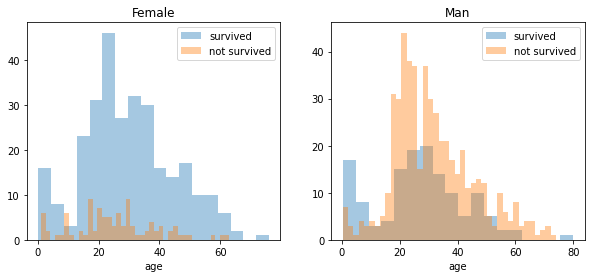

In [24]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

women = df[df['sex'] == 'female']
man = df[df['sex'] == 'male']
ax = sns.distplot(women[women['survived'] == 1].age.dropna(), bins = 18, label = survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['survived'] == 0].age.dropna(), bins = 40, label = not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(man[man['survived'] == 1].age.dropna(), bins = 18, label = survived, ax=axes[1], kde=False)
ax = sns.distplot(man[man['survived'] == 0].age.dropna(), bins = 40, label = not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Man')

In [ ]:
FacetGrid = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', alpha=.5, bins=20)


<AxesSubplot:xlabel='pclass', ylabel='survived'>

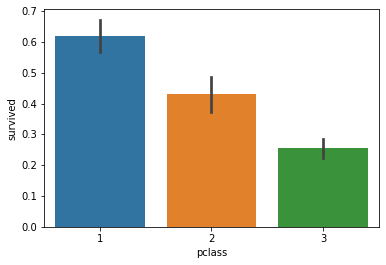

In [25]:
sns.barplot(x='pclass', y='survived', data=df)

In [ ]:
grid = sns.FacetGrid(df, col='survived', row='pclass', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', )

In [ ]:
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

df['not_alone'].value_counts()

In [2]:
import pandas as pd
import re

df = pd.read_csv("titanic.csv")

deck = {'A': 1, 'B': 2, 'C':3,'D': 4, 'E': 5, 'F':6,'G': 7, 'U': 8}
for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna('U0')
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x))
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)

df = df.drop(['cabin'], axis=1)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN,304.0,NaN,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN,NaN,NaN,0


In [4]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [6]:
df.drop('ticket', axis=1)
df.drop('boat', axis=1)
df.drop('body', axis=1)
df.drop('home.dest', axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN,328.0,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN,304.0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN,NaN,0


In [8]:
df.info

<bound method DataFrame.info of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare embarked boat

In [10]:
for dataset in [df]:
    mean = df['age'].mean()
    std = df['age'].std()
    is_null = dataset['age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    age_slice = dataset['age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['age'] = age_slice
    dataset['age'] = df['age'].astype(int)

df['age'].isnull().sum()

0

In [21]:
#df['embarked'].describe()

print(df['embarked'].isna)

<bound method Series.isna of 0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object>


In [24]:
common_value = 'S'

for dataset in [df]:
    #dataset['embarked'] = dataset['embarked'].fillna(method=common_value)
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [ ]:
df.info()

In [27]:
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in [df]:
    dataset['title'] = dataset.name.str.extract('([A-Za-z]+)\.', expand=False)
    print(dataset['title'])
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    dataset['title'] = dataset['title'].map(titles)
    dataset['title'] = dataset['title'].fillna(0)

df = df.drop(['name'], axis=1)

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object


In [6]:
import pandas as pd
bank = pd.read_csv('bank.csv', delimiter=';')

bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
